# Einführung in Word2Vec
adaptiert von: Eugenio Tufino et al. (2024)

Word2Vec ist ein leistungsstarker Algorithmus, der von Mikolov et al. (2013) eingeführt wurde, um Wort-Embeddings – numerische Vektor-Darstellungen von Wörtern – zu lernen. Diese Embeddings erfassen semantische Beziehungen zwischen Wörtern, indem sie deren Ko-Vorkommen innerhalb eines großen Textkorpus analysieren. Wörter, die in ähnlichen Kontexten erscheinen, werden in Vektoren abgebildet, die einander in einem hochdimensionalen Raum nahe sind, wodurch Beziehungen wie Analogien entdeckt werden können (z.B. "König" - "Mann" + "Frau" ≈ "Königin").
Durch die Darstellung von Wörtern als Vektoren eröffnet Word2Vec die Möglichkeit, komplexe sprachliche und konzeptionelle Beziehungen auf eine intuitive, mathematische Weise zu untersuchen.
Dieses Notebook ermöglicht, das Word2Vec-Modell interaktiv zu erkunden.

# 1. Importieren der Bibliotheken für die Verwendung von Word2Vec.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.decomposition import PCA

Für diesen Workshop, bei dem die Zeit- und Computerressourcen begrenzt sind, können wir zwischen drei verschiedenen Modellen wählen.
<!DOCTYPE html>
<html lang="de">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <ul>
        <li>glove-twitter-25</li>
        <li>Glove-Wikipedia-Gigaword-100</li>
        <li>Word2Vec-Google-News-300 (wenn genügend Zeit und Bandbreite vorhanden ist)</li>
    </ul>
    <p>
        Verschiedene Word2Vec-Modelle haben unterschiedliche Fähigkeiten. Jedes Word2Vec-Modell wird auf einem bestimmten Korpus (Datensatz) und mit unterschiedlichen Parametern trainiert, was die Leistung für bestimmte Aufgaben beeinflusst. Für die folgenden Aufgaben ist zu beachten, dass die Modelle ausschließlich auf die englische Sprache trainiert wurden.
    </p>
</body>
</html>

1. Model (Twitter):

In [49]:
model_twitter = api.load('glove-twitter-25')

2. Model:

In [52]:
glove_model = api.load('glove-wiki-gigaword-100')

3. Model (ungefähre 1.5 GB):

In [57]:
google_news_model = api.load('word2vec-google-news-300')

## 2. Exploration der Modelle

Überprüfen Sie die Größe des Vokabulars und die Dimension des Vektoraums der Modelle. 

In [80]:
model=glove_model
vocabulary_size = len(model.key_to_index)
print(f"Die Größe des Vokabulars beträgt: {vocabulary_size}")
# Check the vector size (number of dimensions)
vector_size = model.vector_size
print(f"Die Dimension der Vektoren ist {vector_size}.")


Die Größe des Vokabulars beträgt: 400000
Die Dimension der Vektoren ist 100.


Wir können auch die Liste aller verfügbaren Funktionen und Attribute des Modells überprüfen.

In [86]:
public_methods = [method for method in dir(model) if not method.startswith("_")]
print(public_methods)

['add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_sims', 'intersect_word2vec_format', 'key_to_index', 'lifecycle_events', 'load', 'load_word2vec_format', 'log_accuracy', 'log_evaluate_word_pairs', 'mapfile_path', 'most_similar', 'most_similar_cosmul', 'most_similar_to_given', 'n_similarity', 'next_index', 'norms', 'rank', 'rank_by_centrality', 'relative_cosine_similarity', 'resize_vectors', 'save', 'save_word2vec_format', 'set_vecattr', 'similar_by_key', 'similar_by_vector', 'similar_by_word', 'similarity', 'similarity_unseen_docs', 'sort_by_descending_frequency', 'unit_normalize_all', 'vector_size', 'vectors', 'vectors_for_all', 'vectors_norm', 'vocab', 'wmdis

<!DOCTYPE html>
<html lang="de">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Wichtige Funktionen für Word2Vec-Modelle</title>
</head>
    <ul>
        <li><strong>model.most_similar(word, topn=5):</strong> Findet die Top-N-Wörter, die dem gegebenen Wort am ähnlichsten sind.
            <br><em>Beispiel: model.most_similar("physics", topn=5)</em>
        </li>
        <li><strong>model.similarity(word1, word2):</strong> Berechnet den Ähnlichkeitswert zwischen zwei Wörtern.
            <br><em>Beispiel: model.similarity("physics", "science")</em>
        </li>
        <li><strong>model.doesnt_match(list_of_words):</strong> Findet das Wort, das nicht zu den anderen passt.
            <br><em>Beispiel: model.doesnt_match(["physics", "chemistry", "cat"])</em>
        </li>
        <li><strong>model.get_vector(word):</strong> Holt die Vektor-Repräsentation eines Wortes.
            <br><em>Beispiel: vector = model.get_vector("physics")</em>
        </li>
    </ul>
    <p>Zur Vereinfachung sind die folgenden vordefinierten Funktionen im Notebook enthalten. Diese bauen auf dem vorab geladenen Modell auf, wodurch es den Studenten leicht gemacht wird, ohne zusätzliche Einrichtung zu experimentieren.</p>
</body>
</html>

In [94]:
def find_similar_words(word, topn=5):
  """
    Findet die top-N ähnlichsten Wörter zum gegebenen Wort.

    Parameter:
        word (str): Das Wort, für das ähnliche Wörter gefunden werden sollen.
        topn (int): Anzahl der zurückgegebenen ähnlichen Wörter (Standardwert ist 5).

    Rückgabewert:
        list: Eine Liste von Tupeln (Wort, Ähnlichkeitswert).
  """
  return model.most_similar(word, topn=topn)

def analogy(word1, word2, word3, topn=1):
  """
  Löst eine Analogie der Form: word1 ist zu word2 wie word3 zu ?.

    Parameter:
        word1 (str): Das erste Wort in der Analogie (das "Basis"-Wort, das subtrahiert wird).
        word2 (str): Das zweite Wort in der Analogie (das "Ziel"-Wort, das hinzugefügt wird).
        word3 (str): Das dritte Wort in der Analogie (das "Vergleichs"-Wort, das hinzugefügt wird).
        topn (int): Anzahl der zurückgegebenen Ergebnisse (Standardwert: 1).
  """
  return model.most_similar(positive=[word2, word3], negative=[word1], topn=topn)

def visualize_words(words):
    """
    2D Visualisierung von Wort-Embeddings.
    Diese Funktion nimmt eine Liste von Wörtern, ruft die entsprechenden Wort-Embeddings
    aus dem geladenen Word2Vec-Modell ab und reduziert die Dimensionalität der Embeddings
    auf 2D mittels Hauptkomponentenanalyse (PCA).
    Die resultierenden 2D-Vektoren werden als Punkte in einem Streudiagramm dargestellt.

    """
    word_vectors = [model[word] for word in words]
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

    plt.title("2D Visualisierung von Wort-Embeddings", fontsize=20)
    plt.xlabel("Hauptkomponente 1", fontsize=18)
    plt.ylabel("Hauptkomponente 2", fontsize=18)
    plt.grid(True)
    plt.show()

<!DOCTYPE html>
<html lang="de">
<body>
    <h1>Ähnliche Worte</h1>
    <p>Die Funktion gilt nur für Wörter, die ursprünglich im Modellvokabular enthalten sind.</p>
</body>
</html>

In [153]:
# Beispiel 1
find_similar_words("physics")

[('chemistry', 0.8497999906539917),
 ('mathematics', 0.834094762802124),
 ('science', 0.7914698719978333),
 ('biology', 0.7894973158836365),
 ('theoretical', 0.7342938780784607)]

In [102]:
# Example 2
find_similar_words("current")

[('the', 0.7568359971046448),
 ('present', 0.7507789134979248),
 ('change', 0.7466318607330322),
 ('this', 0.7455748319625854),
 ('its', 0.7453489899635315)]

<h1>Analogien</h1>

In [105]:
word1, word2, word3 = "electron", "proton", "negative"
print(f"\nAnalogie: {word1} : {word2} :: {word3} : ?")
print(analogy(word1, word2, word3))


Analogie: electron : proton :: negative : ?
[('positive', 0.6567757725715637)]


In [111]:
print("\nAnalogy: japanise : sushi :: italian : ?")
print(analogy('japanese', 'sushi', 'italian',topn=5))


Analogy: japanise : sushi :: italian : ?
[('pasta', 0.6288173794746399), ('tapas', 0.6202685236930847), ('chef', 0.620057225227356), ('dessert', 0.6084833145141602), ('chefs', 0.5927476286888123)]


In [113]:
print("\nAnalogie: man : surgeon :: woman : ?")
print(analogy('man', 'medic', 'woman'))


Analogie: man : surgeon :: woman : ?
[('paramedic', 0.6217485070228577)]


<!DOCTYPE html>
<html lang="de">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Visualisierung von Word Embeddings in zwei Dimensionen</h1>
    <p>
        Die Visualisierung eines Vektors in 2D wird mit Hauptkomponentenanalyse (Principal Component Analysis, PCA) erreicht. 
        PCA reduziert den hochdimensionalen Vektorraum auf 2D. 
        PCA kann dabei wichtige Beziehungen zwischen Wörtern in den reduzierten Dimensionen verlieren. 
        Es ist eher für die Visualisierung geeignet, nicht für präzise Analysen.
    </p>
</body>
</html>

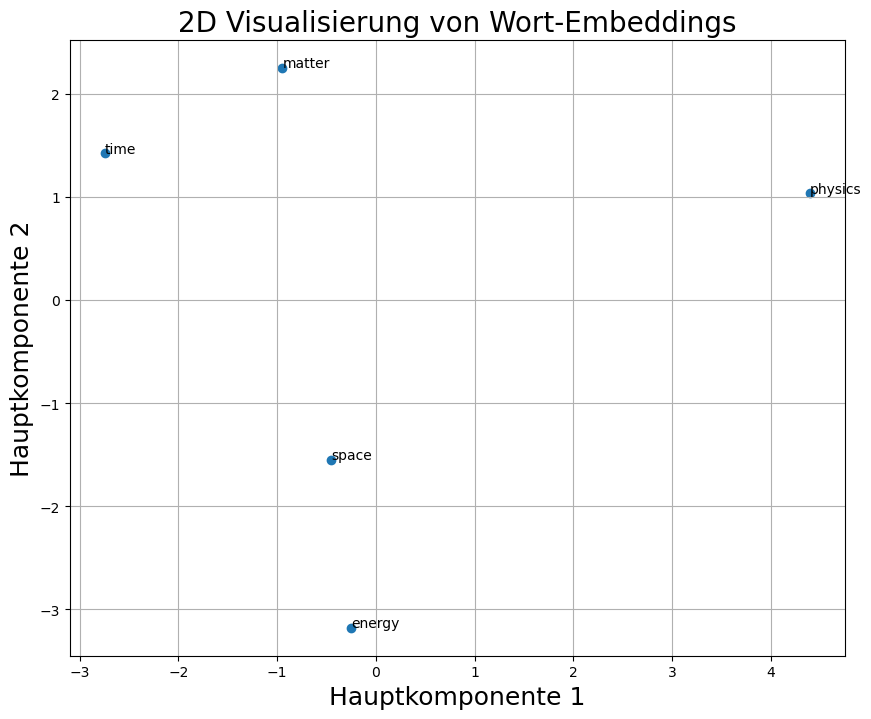

In [128]:
visualize_words(['physics', 'energy', 'matter', 'space', 'time'])